In [326]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [327]:
df = pd.read_csv('Product_sales.csv')
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [328]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [329]:
df.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


## Exploratory Data Analysis

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [331]:
df.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [332]:
df.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


## Check columns having null values

In [333]:
print('Columns having null values: ')
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)

Columns having null values: 
Product_ID
Source
Mobile
Sales_Agent
Location


### Check how many null values exists

In [334]:
print('Product Id null values:',df.Product_ID.isnull().sum())
print('Source null values:',df.Source.isnull().sum())
print('Mobile null values:',df.Mobile.isnull().sum())
print('Sales_Agent null values:',df.Sales_Agent.isnull().sum())
print('Location null values:',df.Location.isnull().sum())

Product Id null values: 58
Source null values: 17
Mobile null values: 1810
Sales_Agent null values: 23
Location null values: 58


### Checking duplicate values

In [335]:
df.duplicated().sum()

2

### Fixing the duplicates

In [336]:
df = df.drop_duplicates()

## Business Questions

#### Distribution of leads by status

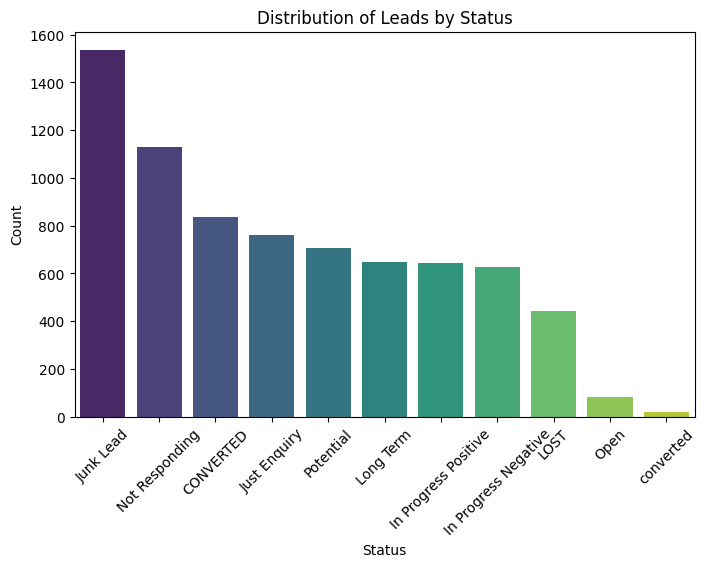

In [337]:
plt.figure(figsize=(8,5))
status_counts = df['Status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribution of Leads by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Combining Status into High potential and low potential

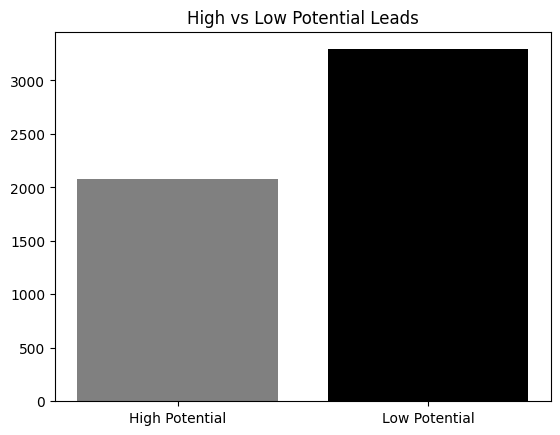

In [338]:
high_potential = df[df['Status'].isin(['Potential', 'In Progress Positive', 'Long Term', 'Open'])].shape[0]
low_potential = df[df['Status'].isin(['Junk Lead', 'Not Responding', 'In Progress Negative'])].shape[0]

plt.bar(['High Potential', 'Low Potential'], [high_potential, low_potential], color=['grey','black'])
plt.title('High vs Low Potential Leads')
plt.show()

## Lead by Source

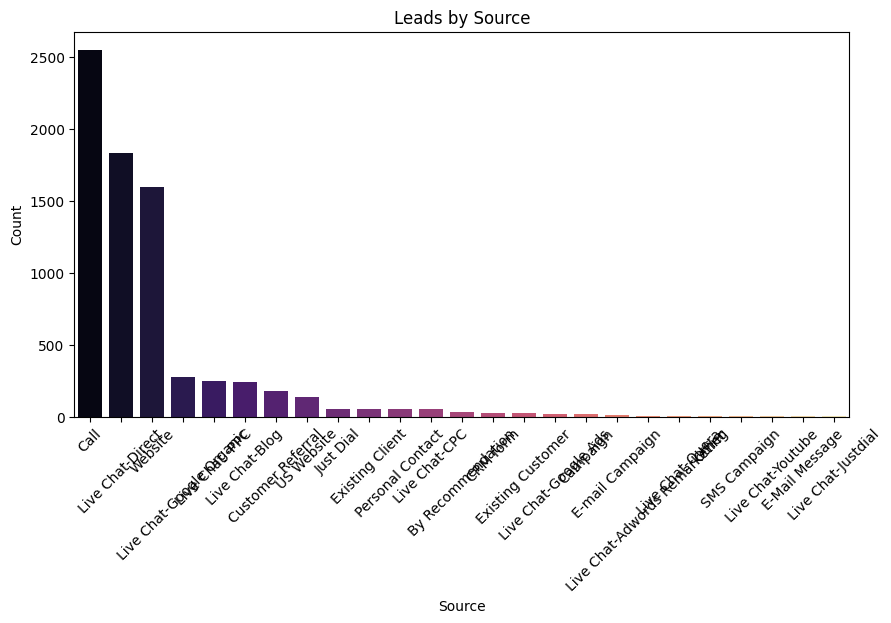

In [339]:
plt.figure(figsize=(10,5))
source_counts = df['Source'].value_counts()
sns.barplot(x=source_counts.index, y=source_counts.values, palette='magma')
plt.title('Leads by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [340]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### fixing null values

In [341]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)

Product_ID
Source
Mobile
Sales_Agent
Location


In [342]:
print('Product Id null values:',df.Product_ID.isnull().sum())
print('Source null values:',df.Source.isnull().sum())
print('Mobile null values:',df.Mobile.isnull().sum())
print('Sales_Agent null values:',df.Sales_Agent.isnull().sum())
print('Location null values:',df.Location.isnull().sum())

Product Id null values: 56
Source null values: 17
Mobile null values: 1810
Sales_Agent null values: 23
Location null values: 56


In [343]:
product_mode = df['Product_ID'].mode()[0]
df['Product_ID'].fillna(product_mode,inplace=True)

In [344]:
Source_Mode = df['Source'].mode()[0]
df['Source'].fillna(Source_Mode,inplace=True)

In [345]:
Agent_mode = df['Sales_Agent'].mode()[0]
df['Sales_Agent'].fillna(Agent_mode,inplace=True)

In [346]:
location_mode = df['Location'].mode()[0]
df['Location'].fillna(location_mode,inplace=True)

In [347]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18.0,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open
1,14-11-2018 09:22,18.0,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open
2,14-11-2018 09:21,18.0,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open
3,14-11-2018 08:46,18.0,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open
4,14-11-2018 07:34,18.0,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


#### Fixing Created column

Convert Created to Data and Time

In [348]:
df['Created'] = pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M')

In [349]:
df['Month'] = df['Created'].dt.month
df['DayOfWeek'] = df['Created'].dt.weekday   
df['Hour'] = df['Created'].dt.hour
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)

In [350]:
df = df.drop(columns=['Created'])

In [351]:
df

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Month,DayOfWeek,Hour,IsWeekend
0,18.0,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,11,2,10,0
1,18.0,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0
2,18.0,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0
3,18.0,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,8,0
4,18.0,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,4,5,9,1
7418,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,4,5,9,1
7419,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,4,5,9,1
7420,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,4,5,8,1


### Change datatype from float to int (PRODUCT_ID)

In [352]:
df['Product_ID'] = df['Product_ID'].astype(int)

In [353]:
df

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Month,DayOfWeek,Hour,IsWeekend
0,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,11,2,10,0
1,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0
2,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0
3,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,8,0
4,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,4,5,9,1
7418,15,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,4,5,9,1
7419,5,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,4,5,9,1
7420,21,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,4,5,8,1


#### Fixing Source column

In [354]:
## Source
df.Source.unique()

array(['Website', 'Call', 'Live Chat-Google Organic', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [355]:
df.Source.nunique()

25

In [356]:
## Combining Source into similar categories to reduce the categorical values
def map_source(source):
    if source in ['Website', 'US Website','Just Dial']:
        return 'Website'
    elif source.startswith('Live Chat'):
        return 'Live Chat'
    elif source in ['Call', 'Personal Contact']:
        return 'Call_Personal'
    elif source in ['E-Mail Message', 'E-mail Campaign', 'CRM form', 'SMS Campaign']:
        return 'Email_Campaign'
    elif source in ['By Recommendation', 'Customer Referral', 'Existing Client', 'Existing Customer']:
        return 'Referral_Existing'
    else:
        return 'Other'

df['Source_grouped'] = df['Source'].apply(map_source)


In [357]:
df

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Month,DayOfWeek,Hour,IsWeekend,Source_grouped
0,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,11,2,10,0,Website
1,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website
2,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website
3,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,8,0,Website
4,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,7,0,Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,4,5,9,1,Call_Personal
7418,15,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,4,5,9,1,Call_Personal
7419,5,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,4,5,9,1,Live Chat
7420,21,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,4,5,8,1,Email_Campaign


In [358]:
df = df.drop(columns=['Source'])

In [359]:
df.head(5)

,Product_ID,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Month,DayOfWeek,Hour,IsWeekend,Source_grouped
0,18,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Open,11,2,10,0,Website
1,18,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website
2,18,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website
3,18,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,8,0,Website
4,18,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,7,0,Website


#### DROP IRRELEVANT COLUMNS

In [360]:
print(df.Mobile.isnull().sum())

1810


In [361]:
df = df.drop(columns=['EMAIL'])

## Fixing Mobile 

In [362]:
df['Mobile_flag'] = df['Mobile'].notnull().astype(int)

In [363]:
df = df.drop(columns=['Mobile'])

In [364]:
df.head()

,Product_ID,Sales_Agent,Location,Delivery_Mode,Status,Month,DayOfWeek,Hour,IsWeekend,Source_grouped,Mobile_flag
0,18,Sales-Agent-11,Other Locations,Mode-5,Open,11,2,10,0,Website,1
1,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website,1
2,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website,1
3,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,8,0,Website,1
4,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,7,0,Website,1


#### FIXING STATUS AGENT

In [365]:
df.Status.value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: count, dtype: int64

In [366]:
def map_status(status):
    high = ['Just Enquiry', 'Potential', 'Long Term', 'In Progress Positive', 'Open', 'CONVERTED']
    if status in high:
        return 'High Potential'
    else:
        return 'Low Potential'

df['Status_target'] = df['Status'].apply(map_status)

In [367]:
df.head()

,Product_ID,Sales_Agent,Location,Delivery_Mode,Status,Month,DayOfWeek,Hour,IsWeekend,Source_grouped,Mobile_flag,Status_target
0,18,Sales-Agent-11,Other Locations,Mode-5,Open,11,2,10,0,Website,1,High Potential
1,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website,1,High Potential
2,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,9,0,Website,1,High Potential
3,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,8,0,Website,1,High Potential
4,18,Sales-Agent-10,Other Locations,Mode-5,Open,11,2,7,0,Website,1,High Potential


In [368]:
df = df.drop(columns=['Status'])
df.head()

,Product_ID,Sales_Agent,Location,Delivery_Mode,Month,DayOfWeek,Hour,IsWeekend,Source_grouped,Mobile_flag,Status_target
0,18,Sales-Agent-11,Other Locations,Mode-5,11,2,10,0,Website,1,High Potential
1,18,Sales-Agent-10,Other Locations,Mode-5,11,2,9,0,Website,1,High Potential
2,18,Sales-Agent-10,Other Locations,Mode-5,11,2,9,0,Website,1,High Potential
3,18,Sales-Agent-10,Other Locations,Mode-5,11,2,8,0,Website,1,High Potential
4,18,Sales-Agent-10,Other Locations,Mode-5,11,2,7,0,Website,1,High Potential


#### Fixing the locations

In [369]:
df.Location.value_counts()

Location
Other Locations    2556
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [370]:
def map_location(loc):
    major_cities = ['Bangalore', 'Chennai', 'Hyderabad', 'Delhi', 'Mumbai', 'Pune', 'Trivandrum', 'Kolkata']
    international = ['UAE', 'USA', 'UK', 'AUSTRALIA', 'Singapore', 'Malaysia', 'EUROPE']
    
    if loc in major_cities:
        return 'Major_Cities'
    elif loc in international:
        return 'International'
    else:
        return 'Other'

df['Location_grouped'] = df['Location'].apply(map_location)

In [371]:
# DROP LOCATION COLUMN
df = df.drop(columns=['Location'])
df.head()

,Product_ID,Sales_Agent,Delivery_Mode,Month,DayOfWeek,Hour,IsWeekend,Source_grouped,Mobile_flag,Status_target,Location_grouped
0,18,Sales-Agent-11,Mode-5,11,2,10,0,Website,1,High Potential,Other
1,18,Sales-Agent-10,Mode-5,11,2,9,0,Website,1,High Potential,Other
2,18,Sales-Agent-10,Mode-5,11,2,9,0,Website,1,High Potential,Other
3,18,Sales-Agent-10,Mode-5,11,2,8,0,Website,1,High Potential,Other
4,18,Sales-Agent-10,Mode-5,11,2,7,0,Website,1,High Potential,Other


In [372]:
df.head()

,Product_ID,Sales_Agent,Delivery_Mode,Month,DayOfWeek,Hour,IsWeekend,Source_grouped,Mobile_flag,Status_target,Location_grouped
0,18,Sales-Agent-11,Mode-5,11,2,10,0,Website,1,High Potential,Other
1,18,Sales-Agent-10,Mode-5,11,2,9,0,Website,1,High Potential,Other
2,18,Sales-Agent-10,Mode-5,11,2,9,0,Website,1,High Potential,Other
3,18,Sales-Agent-10,Mode-5,11,2,8,0,Website,1,High Potential,Other
4,18,Sales-Agent-10,Mode-5,11,2,7,0,Website,1,High Potential,Other


## ENCODING

In [373]:
df.isnull().sum()

Product_ID          0
Sales_Agent         0
Delivery_Mode       0
Month               0
DayOfWeek           0
Hour                0
IsWeekend           0
Source_grouped      0
Mobile_flag         0
Status_target       0
Location_grouped    0
dtype: int64

In [374]:
## Convert status column to label encoding
df['Status_target'] = df['Status_target'].map({
    'High Potential' : 1,
    'Low Potential' : 0
})

In [375]:
df.Status_target.value_counts()

Status_target
0    3749
1    3671
Name: count, dtype: int64

### Creating 2 datasets to check which encoding works best

In [376]:
label_df = df.copy()
ohe_df = df.copy()

In [377]:
# Label encoding for Tree based algorithms
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_cols = ['Sales_Agent', 'Delivery_Mode', 'Source_grouped', 'Location_grouped']

for col in label_cols:
    label_df[col] = le.fit_transform(label_df[col])

label_df.head()

,Product_ID,Sales_Agent,Delivery_Mode,Month,DayOfWeek,Hour,IsWeekend,Source_grouped,Mobile_flag,Status_target,Location_grouped
0,18,2,4,11,2,10,0,5,1,1,2
1,18,1,4,11,2,9,0,5,1,1,2
2,18,1,4,11,2,9,0,5,1,1,2
3,18,1,4,11,2,8,0,5,1,1,2
4,18,1,4,11,2,7,0,5,1,1,2


In [378]:
# OHE encoding for linear model
from sklearn.preprocessing import OneHotEncoder
ohe_df = pd.get_dummies(
    df, 
    columns=['Sales_Agent', 'Delivery_Mode', 'Source_grouped', 'Location_grouped'], 
    drop_first=True,
    dtype=int 
)

ohe_df.head()

,Product_ID,Month,DayOfWeek,Hour,IsWeekend,Mobile_flag,Status_target,Sales_Agent_Sales-Agent-10,Sales_Agent_Sales-Agent-11,Sales_Agent_Sales-Agent-12,...,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5,Source_grouped_Email_Campaign,Source_grouped_Live Chat,Source_grouped_Other,Source_grouped_Referral_Existing,Source_grouped_Website,Location_grouped_Major_Cities,Location_grouped_Other
0,18,11,2,10,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
1,18,11,2,9,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,18,11,2,9,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
3,18,11,2,8,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,18,11,2,7,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1


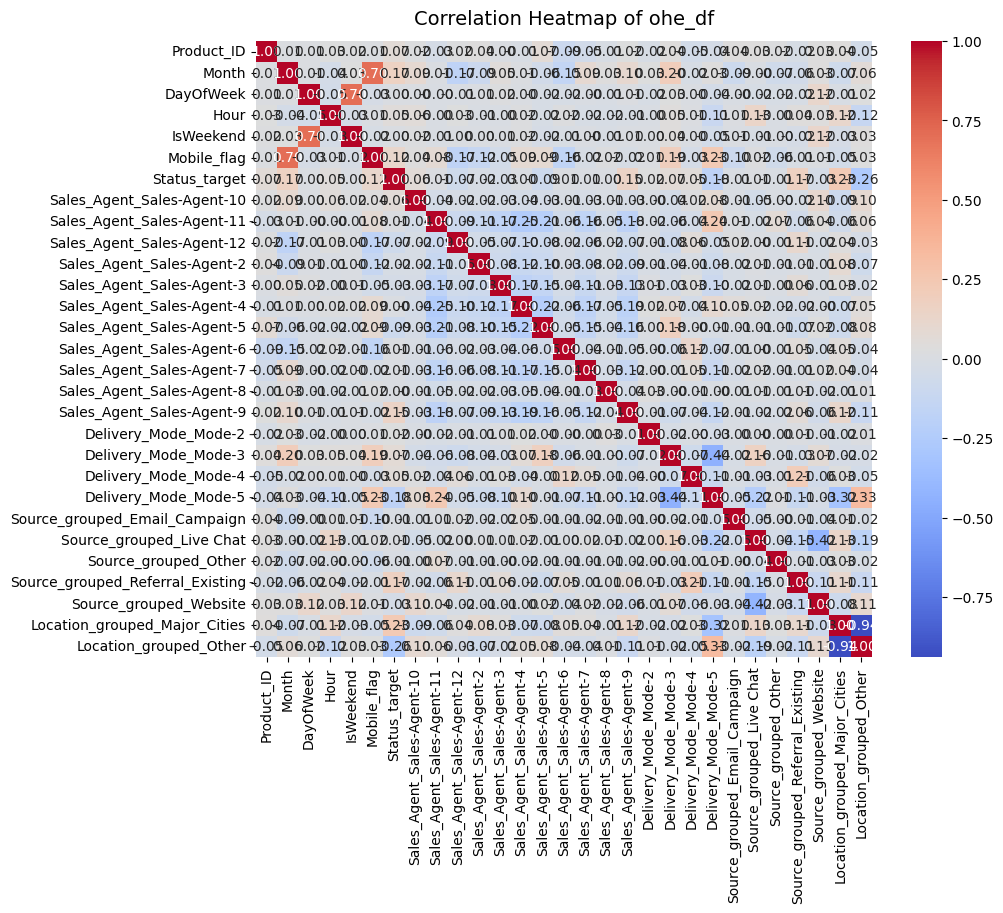

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
corr = ohe_df.corr(numeric_only=True)

# plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of ohe_df", fontsize=14, pad=12)
plt.show()

In [380]:
ohe_df.corr()

,Product_ID,Month,DayOfWeek,Hour,IsWeekend,Mobile_flag,Status_target,Sales_Agent_Sales-Agent-10,Sales_Agent_Sales-Agent-11,Sales_Agent_Sales-Agent-12,...,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5,Source_grouped_Email_Campaign,Source_grouped_Live Chat,Source_grouped_Other,Source_grouped_Referral_Existing,Source_grouped_Website,Location_grouped_Major_Cities,Location_grouped_Other
Product_ID,1.000000,0.013496,0.012256,0.026091,0.015664,0.012894,0.066343,0.021542,-0.034654,0.015964,...,0.041103,-0.052130,-0.036463,0.036629,0.032810,0.017513,-0.018701,0.030446,0.041014,-0.046477
Month,0.013496,1.000000,0.011195,-0.040950,0.025896,0.702575,0.165139,0.091922,0.005130,-0.169051,...,0.199104,-0.017189,0.033246,-0.090472,-0.000677,-0.066859,-0.055695,0.034629,-0.074454,0.063346
DayOfWeek,0.012256,0.011195,1.000000,-0.049239,0.697146,-0.028253,0.004403,0.003362,-0.001111,-0.006867,...,0.030014,0.000737,-0.040101,-0.002111,-0.016338,-0.019064,-0.016601,0.121223,-0.014243,0.022875
Hour,0.026091,-0.040950,-0.049239,1.000000,-0.033293,0.006820,0.048794,0.056330,-0.002790,0.026846,...,0.045140,0.010222,-0.111793,0.009045,0.130402,-0.001846,0.038340,0.032598,0.117385,-0.121450
IsWeekend,0.015664,0.025896,0.697146,-0.033293,1.000000,-0.021214,0.000793,0.021985,-0.006472,0.002315,...,0.043000,0.000533,-0.046578,0.005679,-0.014204,-0.001862,-0.023849,0.124752,-0.030012,0.033117
Mobile_flag,0.012894,0.702575,-0.028253,0.006820,-0.021214,1.000000,0.115797,0.037440,0.076095,-0.166851,...,0.190713,-0.030932,0.229404,-0.095537,0.017000,-0.064256,-0.012212,0.010591,-0.049919,0.030206
Status_target,0.066343,0.165139,0.004403,0.048794,0.000793,0.115797,1.000000,0.063696,0.008540,-0.073671,...,0.073220,0.053497,-0.179806,-0.006798,0.013792,-0.007051,0.168309,-0.030976,0.234569,-0.257543
Sales_Agent_Sales-Agent-10,0.021542,0.091922,0.003362,0.056330,0.021985,0.037440,0.063696,1.000000,-0.038841,-0.015485,...,-0.043327,0.016545,0.083782,-0.005728,-0.045833,-0.004254,-0.015957,0.102115,-0.089369,0.095809
Sales_Agent_Sales-Agent-11,-0.034654,0.005130,-0.001111,-0.002790,-0.006472,0.076095,0.008540,-0.038841,1.000000,-0.094354,...,-0.056422,-0.043702,0.241926,0.008293,-0.020196,0.070817,-0.059793,0.038791,-0.063531,0.060306
Sales_Agent_Sales-Agent-12,0.015964,-0.169051,-0.006867,0.026846,0.002315,-0.166851,-0.073671,-0.015485,-0.094354,1.000000,...,-0.077732,0.060419,-0.052646,0.016388,0.001426,-0.010333,0.107552,-0.016383,0.037947,-0.026853


In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = ohe_df.drop('Status_target', axis=1)  # features only
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                             feature        VIF
0                         Product_ID   8.164023
1                              Month  39.902856
2                          DayOfWeek   5.241617
3                               Hour  12.405128
4                          IsWeekend   2.323776
5                        Mobile_flag  10.484382
6         Sales_Agent_Sales-Agent-10   1.709291
7         Sales_Agent_Sales-Agent-11  16.792875
8         Sales_Agent_Sales-Agent-12   3.873460
9          Sales_Agent_Sales-Agent-2   5.207920
10         Sales_Agent_Sales-Agent-3   9.866067
11         Sales_Agent_Sales-Agent-4  17.528109
12         Sales_Agent_Sales-Agent-5  13.653961
13         Sales_Agent_Sales-Agent-6   2.148195
14         Sales_Agent_Sales-Agent-7   9.284631
15         Sales_Agent_Sales-Agent-8   1.761517
16         Sales_Agent_Sales-Agent-9  11.042530
17              Delivery_Mode_Mode-2   1.013128
18              Delivery_Mode_Mode-3   2.119438
19              Delivery_Mode_Mode-4   1

In [382]:
'''
# Assuming your month column is numeric 1-12
ohe_df['Quarter'] = ((ohe_df['Month'] - 1) // 3 + 1)
# Optional: drop 'Month' if you want to replace it
ohe_df = ohe_df.drop('Month', axis=1)
'''

"\n# Assuming your month column is numeric 1-12\nohe_df['Quarter'] = ((ohe_df['Month'] - 1) // 3 + 1)\n# Optional: drop 'Month' if you want to replace it\nohe_df = ohe_df.drop('Month', axis=1)\n"

### Split target column

In [383]:
x0 = ohe_df.drop('Status_target',axis=1)
y0 = ohe_df['Status_target']

In [384]:
xl = label_df.drop('Status_target',axis=1)
yl = label_df['Status_target']

### Applying scaling

In [385]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Product_ID', 'Month', 'DayOfWeek', 'Hour']
scaler = StandardScaler()
x0[num_cols] = scaler.fit_transform(x0[num_cols])


In [386]:
from sklearn.model_selection import train_test_split

# OHE dataset
x_train0, x_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size=0.2, random_state=42, stratify=y0)

# Label Encoded dataset
x_trainl, x_testl, y_trainl, y_testl = train_test_split(xl, yl, test_size=0.2, random_state=42, stratify=yl)

### Applying smote

In [387]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train0_sm,y_train0_sm = smote.fit_resample(x_train0,y_train0)
print(y_train0_sm.value_counts())


Status_target
0    2999
1    2999
Name: count, dtype: int64


# Logistic regression

### Without Balancing

In [412]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train0,y_train0)
y_pred_lr = LR.predict(x_test0)

In [414]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score
f1 = f1_score(y_pred_lr,y_test0)
recall = recall_score(y_pred_lr,y_test0)
accuracy = accuracy_score(y_test0,y_pred_lr)

print(accuracy_score(y_test0,y_pred_lr))
print(classification_report(y_test0,y_pred_lr))

0.6630727762803235
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       750
           1       0.67      0.62      0.65       734

    accuracy                           0.66      1484
   macro avg       0.66      0.66      0.66      1484
weighted avg       0.66      0.66      0.66      1484



In [417]:
from sklearn.metrics import roc_auc_score

y_prob = LR.predict_proba(x_test0)[:, 1]
roc = roc_auc_score(y_test0, y_prob)
print(roc)

0.721008174386921


In [418]:
Logistic_Regression = pd.DataFrame(columns=["Model", "Accuracy","F1","recall","ROC_Score"])
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression WB',accuracy,f1,recall,roc]
Logistic_Regression

,Model,Accuracy,F1,recall,ROC_Score
0,Logistic Regression WB,0.663073,0.64539,0.673077,0.721008


### SMOTE

In [391]:
from sklearn.linear_model import LogisticRegression
LR_SM = LogisticRegression()
LR_SM.fit(x_train0_sm,y_train0_sm)
y_pred_lr_sm = LR_SM.predict(x_test0)

In [419]:
from sklearn.metrics import classification_report,accuracy_score
f1 = f1_score(y_pred_lr_sm,y_test0)
recall = recall_score(y_pred_lr_sm,y_test0)
accuracy = accuracy_score(y_pred_lr_sm,y_test0)

print(accuracy_score(y_pred_lr_sm,y_test0))
print(classification_report(y_pred_lr_sm,y_test0))

0.660377358490566
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       798
           1       0.62      0.67      0.65       686

    accuracy                           0.66      1484
   macro avg       0.66      0.66      0.66      1484
weighted avg       0.66      0.66      0.66      1484



In [421]:
from sklearn.metrics import roc_auc_score

y_prob = LR_SM.predict_proba(x_test0)[:, 1]
roc = roc_auc_score(y_test0, y_prob)
print(roc)

0.7208319709355131


In [422]:
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression SMOTE',accuracy,f1,recall,roc]
Logistic_Regression

,Model,Accuracy,F1,recall,ROC_Score
0,Logistic Regression WB,0.663073,0.64539,0.673077,0.721008
1,Logistic Regression SMOTE,0.660377,0.64507,0.667638,0.720832


#### Hyper paramter tuning

In [394]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}


grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                
    scoring='accuracy',   
    n_jobs=-1
)

grid_search.fit(x_train0_sm, y_train0_sm)

print("Best Parameters:", grid_search.best_params_)

y_pred0 = grid_search.predict(x_test0)



Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [423]:
from sklearn.metrics import classification_report,accuracy_score
f1 = f1_score(y_pred0,y_test0)
recall = recall_score(y_pred0,y_test0)
accuracy = accuracy_score(y_pred0,y_test0)

print("Accuracy on test set:", accuracy_score(y_test0, y_pred0))
print(classification_report(y_test0, y_pred0))

Accuracy on test set: 0.6610512129380054
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       750
           1       0.67      0.62      0.65       734

    accuracy                           0.66      1484
   macro avg       0.66      0.66      0.66      1484
weighted avg       0.66      0.66      0.66      1484



In [ ]:
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression Hyper',accuracy,f1,recall,roc]
Logistic_Regression

### Class weight balanced

In [396]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
log_reg.fit(x_train0,y_train0)
y_pred_lr_bal = log_reg.predict(x_test0)

In [397]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test0,y_pred_lr_bal))
print(classification_report(y_test0,y_pred_lr_bal))

0.6610512129380054
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       750
           1       0.67      0.63      0.65       734

    accuracy                           0.66      1484
   macro avg       0.66      0.66      0.66      1484
weighted avg       0.66      0.66      0.66      1484



In [398]:
from sklearn.metrics import roc_auc_score

y_prob = log_reg.predict_proba(x_test0)[:, 1]
roc_auc_score(y_test0, y_prob)

0.7210590372388739

## KNN

In [399]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train0,y_train0)
y_pred_knn = knn.predict(x_test0)

In [400]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_pred_knn,y_test0))
print(classification_report(y_pred_knn,y_test0))

0.637466307277628
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       738
           1       0.64      0.63      0.64       746

    accuracy                           0.64      1484
   macro avg       0.64      0.64      0.64      1484
weighted avg       0.64      0.64      0.64      1484



### Using SMOTE

In [401]:
from sklearn.neighbors import KNeighborsClassifier
knn_sm = KNeighborsClassifier()
knn_sm.fit(x_train0_sm,y_train0_sm)
y_pred_knn_sm = knn_sm.predict(x_test0)

In [402]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_pred_knn_sm,y_test0))
print(classification_report(y_pred_knn_sm,y_test0))

0.637466307277628
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       732
           1       0.65      0.63      0.64       752

    accuracy                           0.64      1484
   macro avg       0.64      0.64      0.64      1484
weighted avg       0.64      0.64      0.64      1484



### Neighbors = 6

In [403]:
from sklearn.neighbors import KNeighborsClassifier
knn_bal = KNeighborsClassifier(n_neighbors=6)
knn_bal.fit(x_train0_sm,y_train0_sm)
y_pred_knn_bal = knn_bal.predict(x_test0)

In [404]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_pred_knn_bal,y_test0))
print(classification_report(y_pred_knn_bal,y_test0))

0.6307277628032345
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       872
           1       0.54      0.65      0.59       612

    accuracy                           0.63      1484
   macro avg       0.63      0.63      0.63      1484
weighted avg       0.64      0.63      0.63      1484



## SVM

### Without balancing

In [405]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train0,y_train0)
y_pred_svm = svm.predict(x_test0)

In [406]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_pred_svm,y_test0))
print(classification_report(y_pred_svm,y_test0))

0.6704851752021563
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       753
           1       0.66      0.67      0.67       731

    accuracy                           0.67      1484
   macro avg       0.67      0.67      0.67      1484
weighted avg       0.67      0.67      0.67      1484



### SVM using SMOTE

In [407]:
from sklearn.svm import SVC
svm_smote = SVC()
svm_smote.fit(x_train0,y_train0)
y_pred_svm_smote = svm_smote.predict(x_test0)

In [408]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_pred_svm_smote,y_test0))
print(classification_report(y_pred_svm_smote,y_test0))

0.6704851752021563
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       753
           1       0.66      0.67      0.67       731

    accuracy                           0.67      1484
   macro avg       0.67      0.67      0.67      1484
weighted avg       0.67      0.67      0.67      1484



### Class weight Balancing

In [409]:
from sklearn.svm import SVC
svm_bal = SVC(class_weight='balanced')
svm_bal.fit(x_train0,y_train0)
y_pred_svm_bal = svm_bal.predict(x_test0)

In [410]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_pred_svm_bal,y_test0))
print(classification_report(y_pred_svm_bal,y_test0))

0.6711590296495957
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       734
           1       0.68      0.66      0.67       750

    accuracy                           0.67      1484
   macro avg       0.67      0.67      0.67      1484
weighted avg       0.67      0.67      0.67      1484



In [ ]:
a

In [411]:
from sklearn.model_selection import GridSearchCV 

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(x_train0, y_train0)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.9s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.505 total time=   1.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.505 total time=   0.9s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.505 total time=   0.9s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.505 total time=   1.0s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.633 total time=   0.5s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.644 total time=   0.5s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.677 total time=   0.5s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.664 total time=   0.5s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.666 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.615 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

KeyboardInterrupt: 

In [723]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [724]:
svm_hyper = SVC(
    C = 1,
    gamma = 0.1,
    kernel= 'rbf'
)
svm_hyper.fit(x_train0,y_train0)
y_pred_svm_hyper = svm_hyper.predict(x_test0)

In [726]:
print(accuracy_score(y_pred_svm_hyper,y_test0))
print(classification_report(y_pred_svm_hyper,y_test0))

0.6704851752021563
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       749
           1       0.67      0.67      0.67       735

    accuracy                           0.67      1484
   macro avg       0.67      0.67      0.67      1484
weighted avg       0.67      0.67      0.67      1484



## Gradient Boost

### Label encoded dataset

In [739]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5)
GB.fit(x_trainl,y_trainl)
y_pred_GB = GB.predict(x_testl)

In [740]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_GB,y_testl))
print(classification_report(y_pred_GB,y_testl))

0.692722371967655
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       720
           1       0.71      0.68      0.70       764

    accuracy                           0.69      1484
   macro avg       0.69      0.69      0.69      1484
weighted avg       0.69      0.69      0.69      1484



### Using SMOTE Dataset

In [750]:
from sklearn.ensemble import GradientBoostingClassifier
GB_SMOTE = GradientBoostingClassifier(
    n_estimators= 300,
    learning_rate = 0.05,
    random_state= 42,
    max_features= 5
)
GB_SMOTE.fit(x_train0_sm,y_train0_sm)
y_pred_GB_smote = GB_SMOTE.predict(x_test0)

In [751]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_GB_smote,y_test0))
print(classification_report(y_pred_GB_smote,y_test0))

0.6805929919137467
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       710
           1       0.70      0.67      0.69       774

    accuracy                           0.68      1484
   macro avg       0.68      0.68      0.68      1484
weighted avg       0.68      0.68      0.68      1484



### Hyper paramter tuning

In [763]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_hyper = GradientBoostingClassifier()

param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [3,4,5],
    'learning_rate' : [0.05,0.1,1],
    'subsample' : [0.8,1],
    'max_features' : [None,'sqrt']
}

grid_search = GridSearchCV(estimator=gb_hyper,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

grid_search.fit(x_trainl,y_trainl)
y_pred_GB_hyper = grid_search.predict(x_testl)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [759]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'n_estimators': 100, 'subsample': 1}
0.6908754776067328


In [764]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_GB_hyper,y_testl))
print(classification_report(y_pred_GB_hyper,y_testl))

0.6866576819407008
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       723
           1       0.70      0.68      0.69       761

    accuracy                           0.69      1484
   macro avg       0.69      0.69      0.69      1484
weighted avg       0.69      0.69      0.69      1484



## Random Forest

In [765]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_trainl,y_trainl)
y_pred_Rf = RF.predict(x_testl)

In [766]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_Rf,y_testl))
print(classification_report(y_pred_Rf,y_testl))

0.6442048517520216
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       740
           1       0.65      0.64      0.64       744

    accuracy                           0.64      1484
   macro avg       0.64      0.64      0.64      1484
weighted avg       0.64      0.64      0.64      1484



### SMOTE 

In [780]:
from sklearn.ensemble import RandomForestClassifier

random_smote = RandomForestClassifier()
random_smote.fit(x_train0_sm,y_train0_sm)
y_pred_random = random_smote.predict(x_test0)

In [781]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_random,y_test0))
print(classification_report(y_pred_random,y_test0))

0.6509433962264151
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       732
           1       0.66      0.64      0.65       752

    accuracy                           0.65      1484
   macro avg       0.65      0.65      0.65      1484
weighted avg       0.65      0.65      0.65      1484



### Hyper parameter tuning

In [789]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_hyper = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],          
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['sqrt', 'log2'],         
    'bootstrap': [True, False]                
}

grid_search = (GridSearchCV(estimator=random_hyper,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1))
grid_search.fit(x_trainl,y_trainl)
y_pred_RF_hyper = grid_search.predict(x_trainl)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [790]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred_RF_hyper,y_testl))
print(classification_report(y_pred_RF_hyper,y_testl))

ValueError: Found input variables with inconsistent numbers of samples: [5936, 1484]

In [788]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
0.6851447641253876
